In [1]:
# Import library pandas untuk manipulasi dan analisis data
import pandas as pd

# Membaca dataset 'R02_rice_field.csv' menggunakan pandas dan menampilkan 5 baris pertama
data1 = pd.read_csv('R02_rice_field.csv')
data1.head()

,Production (X),Harvest Area (Y)
0,1329536.0,323589.0
1,1299699.0,329041.0
2,1382905.0,339253.0
3,1419128.0,348223.0
4,1368074.0,337561.0


Kode di atas adalah untuk membaca dataset yang disimpan dalam format CSV menggunakan pustaka pandas. Fungsi head() digunakan untuk menampilkan lima baris pertama dari dataset.

## Korelasi

In [2]:
# Menghitung korelasi antar kolom dalam dataset
data1.corr()

,Production (X),Harvest Area (Y)
Production (X),1.000000,0.905622
Harvest Area (Y),0.905622,1.000000


Berikutnya, kita menghitung korelasi antar kolom dalam dataset menggunakan fungsi corr().

## Split Kolom

In [3]:
# Memisahkan kolom 'Production (X)' dan 'Harvest Area (Y)' untuk digunakan dalam model
import numpy as np
production = data1['Production (X)'].values[:, np.newaxis]
harvest_area = data1['Harvest Area (Y)'].values

Kolom 'Production (X)' dan 'Harvest Area (Y)' dipisahkan untuk digunakan sebagai variabel independen (X) dan dependen (Y) dalam model regresi.

In [4]:
print(production)

[[1329536.  ]
 [1299699.  ]
 [1382905.  ]
 [1419128.  ]
 [1368074.  ]
 [1404580.  ]
 [1478712.  ]
 [1486909.  ]
 [1547499.  ]
 [1314165.  ]
 [1246614.  ]
 [1350748.  ]
 [1411650.  ]
 [1552078.  ]
 [1556858.  ]
 [1402287.  ]
 [1533369.  ]
 [1788738.  ]
 [1772962.  ]
 [1582393.  ]
 [2331046.  ]
 [1820062.  ]
 [1956940.  ]
 [2180754.  ]
 [2478922.  ]
 [1751996.94]
 [1714437.6 ]
 [1861567.1 ]
 [2918152.  ]
 [3079960.  ]
 [3134533.  ]
 [3136760.  ]
 [3212208.  ]
 [3321049.  ]
 [3451430.  ]
 [3514253.  ]
 [3291515.  ]
 [3153305.  ]
 [3403075.  ]
 [3418782.  ]
 [3447394.  ]
 [3007636.  ]
 [3265834.  ]
 [3340794.  ]
 [3527899.  ]
 [3582302.  ]
 [3607403.  ]
 [3715514.  ]
 [3727249.  ]
 [3631039.  ]
 [4044829.  ]
 [4387035.9 ]
 [4669777.5 ]
 [2108284.72]
 [2078901.59]
 [2076280.01]
 [1806424.  ]
 [1747543.  ]
 [1829192.  ]
 [1971180.  ]
 [1787719.  ]
 [1807622.  ]
 [1897678.  ]
 [1759059.  ]
 [1668955.  ]
 [1875834.  ]
 [1823739.  ]
 [1875188.  ]
 [1907390.  ]
 [1889489.  ]
 [1938120.  ]
 [1965

In [5]:
print(harvest_area)

[323589.   329041.   339253.   348223.   337561.   365892.   359817.
 336765.   295212.   315131.   367636.   370966.   337893.   320789.
 360717.   329109.   359375.   352281.   380686.   387803.   419183.
 376137.   461060.   293067.   294483.   329515.78 310012.46 317869.41
 754569.   792534.   795183.   790051.   797545.   823749.   838626.
 847610.   801948.   765161.   825188.   826091.   822073.   705023.
 750232.   748540.   768407.   754674.   757547.   765099.   742968.
 717318.   781769.   423029.   415675.   408176.45 413141.24 388591.22
 394412.   382740.   400627.   430343.   395728.   412810.   432254.
 396919.   376710.   424253.   411860.   422582.   426950.   417846.
 423655.   421902.   439542.   460497.   461709.   476422.   487820.
 503198.   507545.   222482.   222021.   313050.82 311671.23 295664.47
 146133.   146177.   152204.   150354.   137953.   126280.   155683.
 141640.   132507.   129025.   132887.   145239.   134418.   136177.
 147167.   147796.   149423.

## Modelling

In [6]:
# Membuat model regresi linear
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(production, harvest_area)

LinearRegression()

Model regresi linear dibuat menggunakan pustaka scikit-learn.

## Testing

In [7]:
# Melakukan pengujian dengan data produksi 3 dan 4.5
production_test = [[3],[4.5]]
pred_harvest_area = model1.predict(production_test)
print("Prediksi Area Panen: ", pred_harvest_area)

Prediksi Area Panen:  [69495.21821384 69495.49045453]


Model diuji menggunakan data produksi baru, yaitu 3 dan 4.5, untuk memprediksi hasil panen.

In [8]:
# Menampilkan koefisien dan intercept dari model regresi
print("Koefisien: ", model1.coef_)
print("Intercept: ", model1.intercept_)

Koefisien:  [0.1814938]
Intercept:  69494.67373244296


Koefisien dan intercept dari model regresi linear ditampilkan.

In [9]:
#Testing rumus
y = model1.coef_ * 27 + model1.intercept_
print(y)

[69499.57406498]


## Visualisasi 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


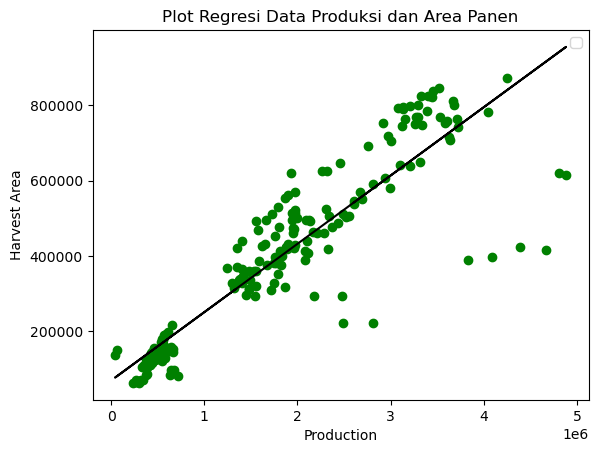

In [10]:
# Visualisasi hasil regresi
import matplotlib.pyplot as plt

production = data1['Production (X)'].values.reshape(-1,1)
prediksi_score = model1.predict(production)

dataframe_baru = pd.DataFrame({'Production (X)': data1['Production (X)'], 'Harvest Area (Y)': prediksi_score})
plt.scatter(data1['Production (X)'], data1['Harvest Area (Y)'], color='green')
plt.plot(dataframe_baru['Production (X)'], dataframe_baru['Harvest Area (Y)'], color='black',)
plt.xlabel('Production')
plt.ylabel('Harvest Area')
plt.title('Plot Regresi Data Produksi dan Area Panen')
plt.legend()
plt.show()


Terakhir, hasil regresi divisualisasikan dengan menggunakan matplotlib. Scatter plot menunjukkan titik data aktual, sementara garis hitam merupakan garis regresi linear yang dihasilkan oleh model.